In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
boa_df = pd.read_csv("data/processed/boa_reviews_sentiment.csv")
cbe_df = pd.read_csv("data/processed/cbe_reviews_sentiment.csv")
dashen_df = pd.read_csv("data/processed/dashen_reviews_sentiment.csv")


In [20]:
boa_df.to_csv("boa_sentiment.csv", index=False)
cbe_df.to_csv("cbe_sentiment.csv", index=False)
dashen_df.to_csv("dashen_sentiment.csv", index=False)


In [22]:
print(boa_df.columns)
print(cbe_df.columns)
print(dashen_df.columns)


Index(['review', 'rating', 'date', 'review_length', 'bank', 'source', 'neg',
       'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')
Index(['review', 'rating', 'date', 'review_length', 'bank', 'source', 'neg',
       'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')
Index(['review', 'rating', 'date', 'review_length', 'bank', 'source', 'neg',
       'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')


In [23]:
boa_reviews = boa_df[["review", "sentiment"]].dropna()
cbe_reviews = cbe_df[["review", "sentiment"]].dropna()
dashen_reviews = dashen_df[["review", "sentiment"]].dropna()


In [29]:
boa_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
boa_tfidf = boa_vectorizer.fit_transform(boa_reviews["review"])

cbe_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
cbe_tfidf = cbe_vectorizer.fit_transform(cbe_reviews["review"])

dashen_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
dashen_tfidf = dashen_vectorizer.fit_transform(dashen_reviews["review"])


In [25]:
k = 4

boa_kmeans = KMeans(n_clusters=k, random_state=42)
boa_kmeans.fit(boa_tfidf)

cbe_kmeans = KMeans(n_clusters=k, random_state=42)
cbe_kmeans.fit(cbe_tfidf)

dashen_kmeans = KMeans(n_clusters=k, random_state=42)
dashen_kmeans.fit(dashen_tfidf)


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [26]:
boa_reviews["cluster"] = boa_kmeans.labels_
cbe_reviews["cluster"] = cbe_kmeans.labels_
dashen_reviews["cluster"] = dashen_kmeans.labels_


In [27]:
def get_top_keywords(model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    keywords = {}
    for i, center in enumerate(model.cluster_centers_):
        top_ids = center.argsort()[-n_terms:][::-1]
        keywords[i] = [terms[idx] for idx in top_ids]
    return keywords


In [30]:
boa_keywords = get_top_keywords(boa_kmeans, boa_vectorizer)
cbe_keywords = get_top_keywords(cbe_kmeans, cbe_vectorizer)
dashen_keywords = get_top_keywords(dashen_kmeans, dashen_vectorizer)

print("BOA Top Keywords per Cluster:\n", boa_keywords)
print("CBE Top Keywords per Cluster:\n", cbe_keywords)
print("Dashen Top Keywords per Cluster:\n", dashen_keywords)


BOA Top Keywords per Cluster:
 {0: ['opening', 'say', 'phone', 'better', 'don', 'boa', 'use', 'app', 'balance', 'bad'], 1: ['app', 'good', 'work', 'bank', 'working', 'best', 'banking', 'worst', 'doesn', 'use'], 2: ['boa', 'great', 'mobile', 'bank', 'thank', 'service', 'app', 'don', 'ui', 'love'], 3: ['bad', 'app', 'works', 'apps', 'open', 'doesn', 'work', 'bank', 'balance', 'awesome']}
CBE Top Keywords per Cluster:
 {0: ['nice', 'best', 'bank', 'app', 'like', 'easy', 'screenshot', 'fast', 'apps', 'use'], 1: ['application', 'banking', 'good', 'developer', 'industry', 'love', 'cbe', 'app', 'best', 'seen'], 2: ['app', 'good', 'best', 'nice', 'great', 'make', 'convenient', 'use', 'banking', 'excellent'], 3: ['cbe', 'thank', 'app', 'good', 'using', 'bank', 'wow', 'consent', 'commercial', 'happy']}
Dashen Top Keywords per Cluster:
 {0: ['convenient', 'fast', 'user', 'banking', 'friendly', 'changer', 'game', 'app', 'ethiopian', 'smooth'], 1: ['good', 'app', 'wow', 'amazing', 'great', 'applica

In [31]:
boa_reviews.to_csv("data/boa_clustered.csv", index=False)
cbe_reviews.to_csv("data/cbe_clustered.csv", index=False)
dashen_reviews.to_csv("data/dashen_clustered.csv", index=False)


In [32]:
# Define theme mappings per bank
boa_theme_map = {
    0: "Account Access & Balance Issues",
    1: "Mixed App Performance",
    2: "Positive User Experience & UI",
    3: "App Functionality Issues"
}

cbe_theme_map = {
    0: "Positive App Experience",
    1: "Developer & Application Praise",
    2: "Convenience & Excellence",
    3: "Customer Satisfaction & Gratitude"
}

dashen_theme_map = {
    0: "Convenience & Usability",
    1: "Mixed Performance & Features",
    2: "Positive Experience & Speed",
    3: "Strong Recommendation"
}

# Assign themes
boa_reviews["theme"] = boa_reviews["cluster"].map(boa_theme_map)
cbe_reviews["theme"] = cbe_reviews["cluster"].map(cbe_theme_map)
dashen_reviews["theme"] = dashen_reviews["cluster"].map(dashen_theme_map)

# Save the new DataFrames
boa_reviews.to_csv("data/boa_labeled_themes.csv", index=False)
cbe_reviews.to_csv("data/cbe_labeled_themes.csv", index=False)
dashen_reviews.to_csv("data/dashen_labeled_themes.csv", index=False)

print("🎉 Theme labeling complete and saved!")


🎉 Theme labeling complete and saved!


In [33]:
# Add theme column to each DataFrame
boa_reviews["theme"] = boa_reviews["cluster"].map(boa_theme_map)
cbe_reviews["theme"] = cbe_reviews["cluster"].map(cbe_theme_map)
dashen_reviews["theme"] = dashen_reviews["cluster"].map(dashen_theme_map)


In [34]:
boa_reviews.to_csv("data/boa_themes.csv", index=False)
cbe_reviews.to_csv("data/cbe_themes.csv", index=False)
dashen_reviews.to_csv("data/dashen_themes.csv", index=False)


In [36]:
boa_theme_map = {
    0: "Account Access & Balance Issues",
    1: "Mixed App Performance",
    2: "Positive User Experience & UI",
    3: "App Functionality Issues"
}

cbe_theme_map = {
    0: "Positive App Experience",
    1: "Developer & Application Praise",
    2: "Convenience & Excellence",
    3: "Customer Satisfaction & Gratitude"
}

dashen_theme_map = {
    0: "Convenience & Usability",
    1: "Mixed Performance & Features",
    2: "Positive Experience & Speed",
    3: "Strong Recommendation"
}


In [37]:
boa_reviews["theme"] = boa_reviews["cluster"].map(boa_theme_map)
cbe_reviews["theme"] = cbe_reviews["cluster"].map(cbe_theme_map)
dashen_reviews["theme"] = dashen_reviews["cluster"].map(dashen_theme_map)


In [38]:
combined_df = pd.concat([
    boa_reviews.assign(bank="BOA"),
    cbe_reviews.assign(bank="CBE"),
    dashen_reviews.assign(bank="Dashen")
], ignore_index=True)


In [43]:
combined_df.to_csv("data/all_banks_themes_sentiment.csv", index=False)


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

boa_reviews["bank"] = "BOA"
cbe_reviews["bank"] = "CBE"
dashen_reviews["bank"] = "Dashen"

all_reviews = pd.concat([boa_reviews, cbe_reviews, dashen_reviews], ignore_index=True)


In [49]:
print(all_reviews.columns)


Index(['review', 'sentiment', 'cluster', 'theme', 'bank'], dtype='object')


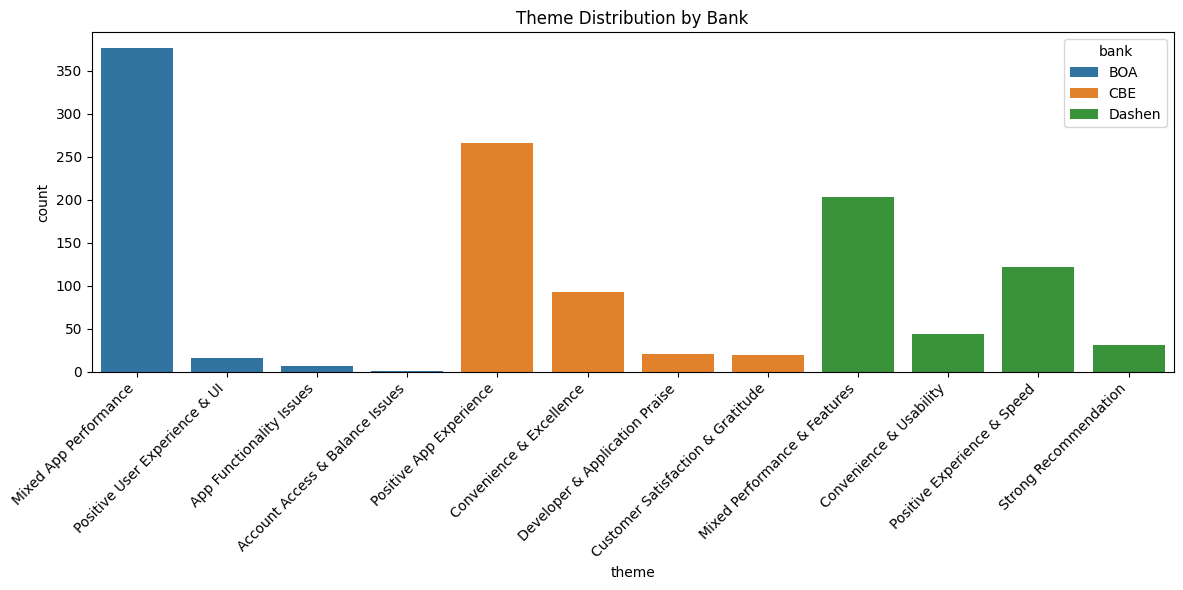

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=combined_df, x="theme", hue="bank")
plt.xticks(rotation=45, ha="right")
plt.title("Theme Distribution by Bank")
plt.tight_layout()
plt.show()


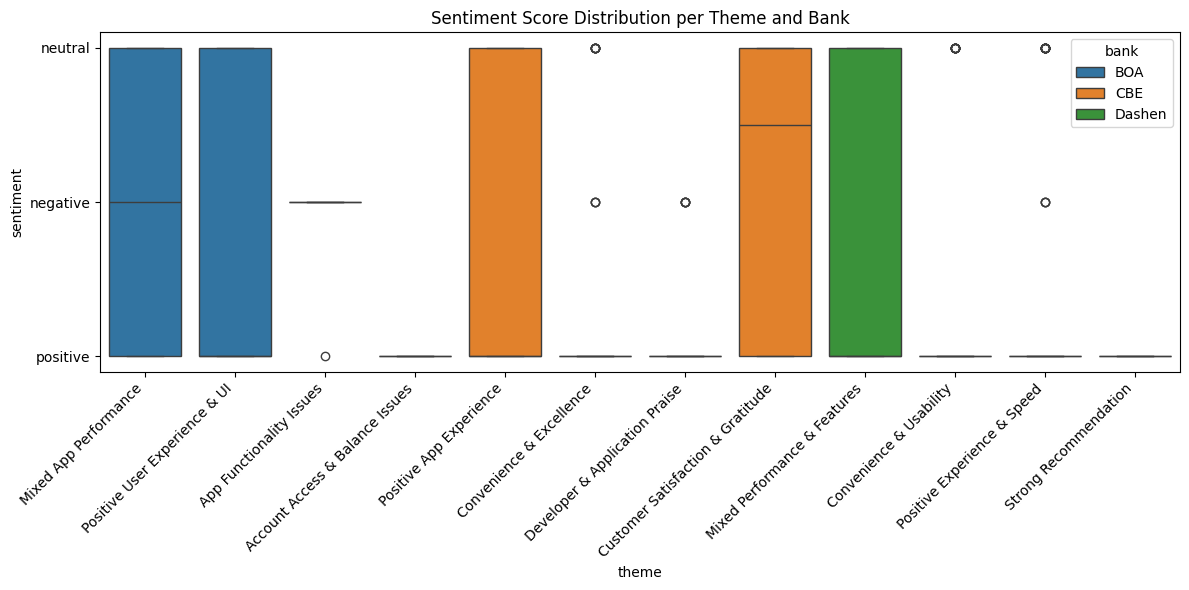

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=all_reviews, x="theme", y="sentiment", hue="bank")
plt.xticks(rotation=45, ha="right")
plt.title("Sentiment Score Distribution per Theme and Bank")
plt.tight_layout()
plt.show()